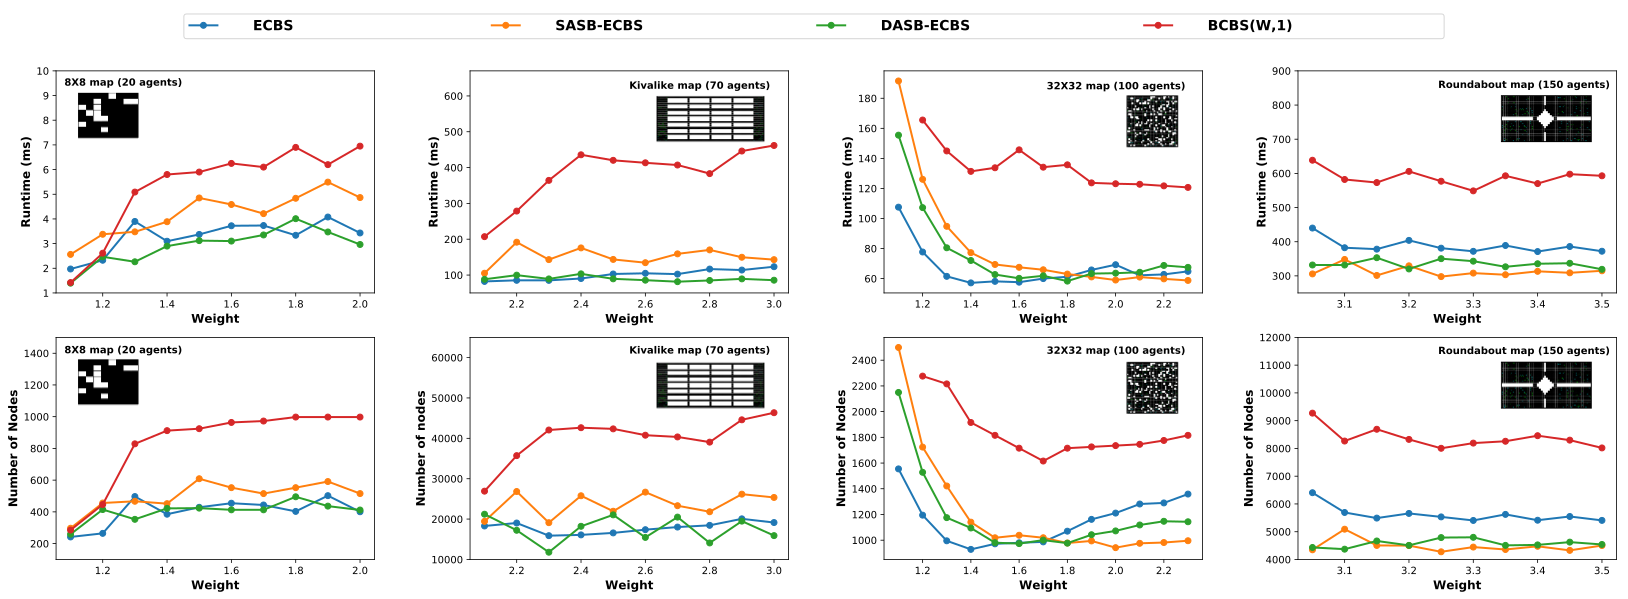

In [53]:
import matplotlib.pyplot as plt
# from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
import matplotlib.image as image
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd 
from operator import truediv
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = [28, 9]


def place_image(im, loc=3, ax=None, zoom=1, **kw):
    if ax==None: ax=plt.gca()
    imagebox = OffsetImage(im, zoom=zoom*0.5)
    ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False, **kw)
    ax.add_artist(ab)



legend_properties = {'weight':'bold',"size":14}

x = [0,1,2,3,4,5]
y1 = [0,1,2,3,4,5]
y2 = [0,2,4,8,16,32]
y3 = [0,1,4,9,16,25]


Data_8by8 = pd.read_csv('Data/_8by8/weightVSruntime_8by8_RAL20-agents.csv')
Data_32by32 = pd.read_csv('Data/_32by32/weightsVSruntime_32by32_RALagents100.csv')
Data_kivalike = pd.read_csv('Data/kivalike/weightVSruntimekivalike-agents70.csv')
Data_roundabount = pd.read_csv('Data/roundabout/weightVSruntime_roundaboutagents150.csv')

Data2_8by8 = pd.read_csv('Data/_8by8/weightsVSnodes_8by8_RALagents-20.csv')
Data2_32by32 = pd.read_csv('Data/_32by32/weightsVSnodes_32by32_RALagents100.csv')
Data2_kivalike = pd.read_csv('Data/kivalike/weightVSnodeskivalike-agents70.csv')
Data2_roundabount = pd.read_csv('Data/roundabout/weightsVSnodes_roundaboutagents150.csv')

solvers = ['ECBS','SASB-ECBS','DASB-ECBS','BCBS(W,1)']

fig = plt.figure()
grid = plt.GridSpec(2, 4, wspace=0.3, hspace=0.2)
ax = plt.subplot(grid[0, 0])
bx = plt.subplot(grid[0, 1])
cx = plt.subplot(grid[0, 2])
dx = plt.subplot(grid[0, 3])

ay = plt.subplot(grid[1, 0])
by = plt.subplot(grid[1, 1])
cy = plt.subplot(grid[1, 2])
dy = plt.subplot(grid[1, 3])


######################################   8 by 8 ################################################

for solver in solvers:
    Data_8by8[solver] = pd.to_numeric(Data_8by8[solver], downcast="float")
    ax.plot(Data_8by8['weight'],Data_8by8[solver]/20.0,'-o',label = solver,linewidth=2)
ax.set_ylim(1,10)
# ax.set_xticks(Data_8by8['weight'])
# ax.set_yticks()
ax.set_xlabel('Weight',fontweight='bold',fontsize=12)
ax.set_ylabel("Runtime (ms)",fontweight='bold',fontsize=12)
ax.text(1.07, 9.4, ' 8X8 map (20 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/8by8.png')
place_image(im, loc=2, ax=ax, pad=1, zoom=.75)

############################## Kivalike #########################################################

for solver in solvers:
    bx.plot(Data_kivalike['weights'],Data_kivalike[solver]/70,'-o',label = solver,linewidth=2)
bx.set_ylim([50,670])
# cx.set_xticks(Data_kivalike['weights'])
# plt.set_yticks(fontweight='bold')
bx.set_xlabel('Weight',fontweight='bold',fontsize=12)
bx.set_ylabel("Runtime (ms)",fontweight='bold',fontsize=12)
bx.text(2.55, 620, 'Kivalike map (70 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/kivalike.png')
place_image(im, loc=1, ax=bx, pad=2, zoom=.45)

############################### 32 by 32  ########################################################

for solver in solvers:
    Data_32by32[solver] = pd.to_numeric(Data_32by32[solver], downcast="float")
    cx.plot(Data_32by32['weights'],Data_32by32[solver]/100,'-o',label = solver,linewidth=2)
cx.set_xlabel('Weight',fontweight='bold',fontsize=12)
cx.set_ylabel("Runtime (ms)",fontweight='bold',fontsize=12)
cx.text(1.7, 186, ' 32X32 map (100 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/32by32.png')
place_image(im, loc=1, ax=cx, pad=2, zoom=.50)



######################## roundabout ###################################################

for solver in solvers:
    Data_roundabount[solver] = pd.to_numeric(Data_roundabount[solver], downcast="float")
    dx.plot(Data_roundabount['weights'],Data_roundabount[solver]/150,'-o',label = solver,linewidth=2)
dx.set_ylim([250,900])
# dx.set_xticks(Data_roundabount['weights'])
# plt.yticks(fontweight='bold')
dx.set_xlabel('Weight',fontweight='bold',fontsize=12)
dx.set_ylabel("Runtime (ms)",fontweight='bold',fontsize=12)
dx.text(3.24, 850, ' Roundabout map (150 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/roundabout.png')
place_image(im, loc=1, ax=dx, pad=2, zoom=.45)

############################ 8by8 ###########################################

for solver in solvers:
    Data2_8by8[solver] = pd.to_numeric(Data2_8by8[solver], downcast="float")
    ay.plot(Data2_8by8['weights'],Data2_8by8[solver]/20.0,'-o',label = solver,linewidth=2)

ay.set_ylim([100,1500])
# ay.set_xticks(Data2_8by8['weights'])
# ay.yticks(fontweight='bold')
ay.set_xlabel('Weight',fontweight='bold',fontsize=12)
ay.set_ylabel("Number of Nodes",fontweight='bold',fontsize=12)
ay.text(1.07, 1400, ' 8X8 map (20 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/8by8.png')
place_image(im, loc=2, ax=ay, pad=1, zoom=.75)


################################ kivalike ######################### 
for solver in solvers:
    Data2_kivalike[solver] = pd.to_numeric(Data2_kivalike[solver], downcast="float")
    by.plot(Data2_kivalike['Weights'],Data2_kivalike[solver]/70.0,'-o',label = solver,linewidth=2)
by.set_ylim([10000,65000])
# cy.set_xticks(Data['Weights'])
# plt.yticks(fontweight='bold')
by.set_xlabel('Weight',fontweight='bold',fontsize=12)
by.set_ylabel("Number of nodes",fontweight='bold',fontsize=12)
by.text(2.55, 61000, 'Kivalike map (70 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/kivalike.png')
place_image(im, loc=1, ax=by, pad=2, zoom=.45)

########################## 32 by 32 ###################################
for solver in solvers:
    Data2_32by32[solver] = pd.to_numeric(Data2_32by32[solver], downcast="float")
    cy.plot(Data2_32by32['weights'],Data2_32by32[solver]/100,'-o',label = solver,linewidth=2)
# plt.ylim(1,10)
# by.set_xticks(Data2_32by32['weights'])
# plt.yticks(fontweight='bold')
cy.set_xlabel('Weight',fontweight='bold',fontsize=12)
cy.set_ylabel("Number of Nodes",fontweight='bold',fontsize=12)
cy.text(1.70, 2450, ' 32X32 map (100 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/32by32.png')
place_image(im, loc=1, ax=cy, pad=2, zoom=.50)



########################### roundabout #################################
for solver in solvers:
    Data2_roundabount[solver] = pd.to_numeric(Data2_roundabount[solver], downcast="float")
    dy.plot(Data2_roundabount['weights'],Data2_roundabount[solver]/150,'-o',label = solver,linewidth=2)
dy.set_ylim([4000,12000])
# plt.xticks(Data['weights'],fontweight='bold')
# plt.yticks(fontweight='bold')
dy.set_xlabel('Weight',fontweight='bold',fontsize=12)
dy.set_ylabel("Number of Nodes",fontweight='bold',fontsize=12)
dy.text(3.24, 11400, ' Roundabout map (150 agents)', style='normal',fontweight='bold')

im = image.imread('Map_image/roundabout.png')
place_image(im, loc=1, ax=dy, pad=2, zoom=.45)

legend_elements = [Line2D([0], [0], color='#1f77b4', marker='o', lw=2, label='     ECBS                                   '),
                   Line2D([0], [0], color='#ff7f0e', marker='o', lw=2, label='     SASB-ECBS                              '),
                   Line2D([0], [0], color='#2ca02c', marker='o', lw=2, label='     DASB-ECBS                              '),
                   Line2D([0], [0], color='#d62728', marker='o', lw=2, label='     BCBS(W,1)                              '),]

# fig.subplots_adjust(top=0.3)
# red_patch = mpatches.Patch(color='red', marker = '-o', label='The red data')
fig.legend(handles=legend_elements, prop=legend_properties, loc='upper center', borderaxespad=1.0,ncol=4)


# img1 = mpimg.imread('Map_image/8by8.png')
# img2 = mpimg.imread('Map_image/32by32.png')

# ax.imshow(img1)

# bx.imshow(img2)



plt.show()

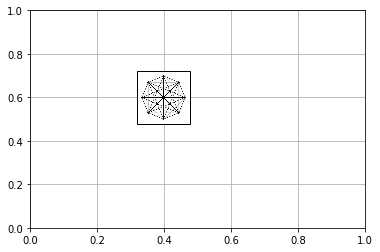

In [124]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
